In [123]:
import pandas as pd
import numpy as np
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Preprocessing

In [156]:
d = pd.read_csv('train.csv')

In [157]:
d.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


C:\Users\haari\AppData\Local\Temp\ipykernel_7264\3903050548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = d,x = 'label', palette = 'pastel')


Text(0.5, 1.0, 'Distribution of Fake and Real news')

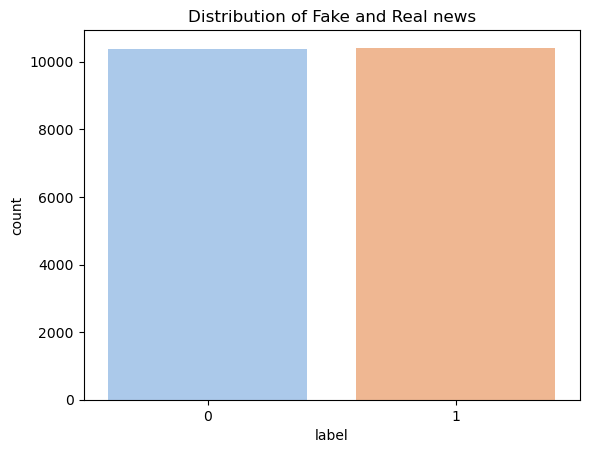

In [160]:
import matplotlib.pyplot as plt
sns.countplot(data = d,x = 'label', palette = 'pastel')
plt.title('Distribution of Fake and Real news')

In [162]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


(-0.5, 799.5, 399.5, -0.5)

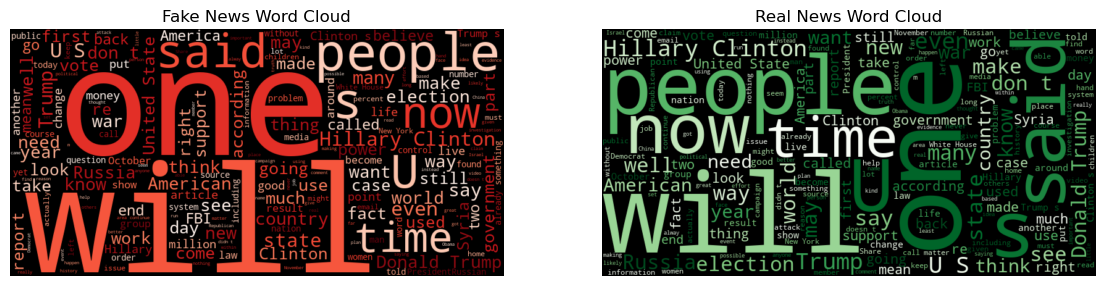

In [163]:
from wordcloud import WordCloud

fake = ' '.join(d[d['label'] == 1]['text'].dropna())
real = ' '.join(d[d['label'] == 1]['text'].dropna())

fakewc = WordCloud(width = 800, height = 400, background_color = 'black', colormap = 'Reds').generate(fake)
realwc = WordCloud(width = 800, height = 400, background_color = 'black', colormap = 'Greens').generate(real)

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(fakewc, interpolation = 'bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(122)
plt.imshow(realwc, interpolation = 'bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

Text(0.5, 1.0, 'Missing data')

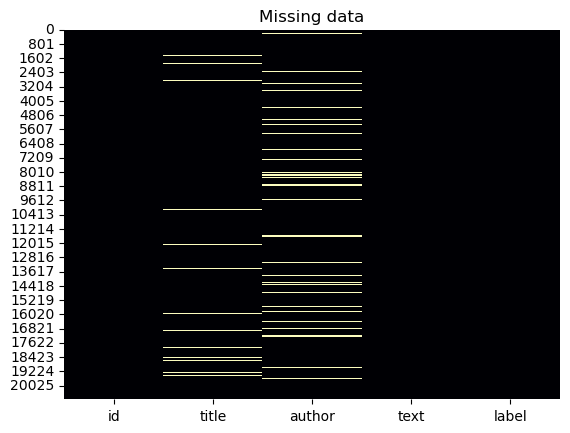

In [176]:
sns.heatmap(d.isnull(), cbar = False, cmap = 'magma')
plt.title('Missing data')

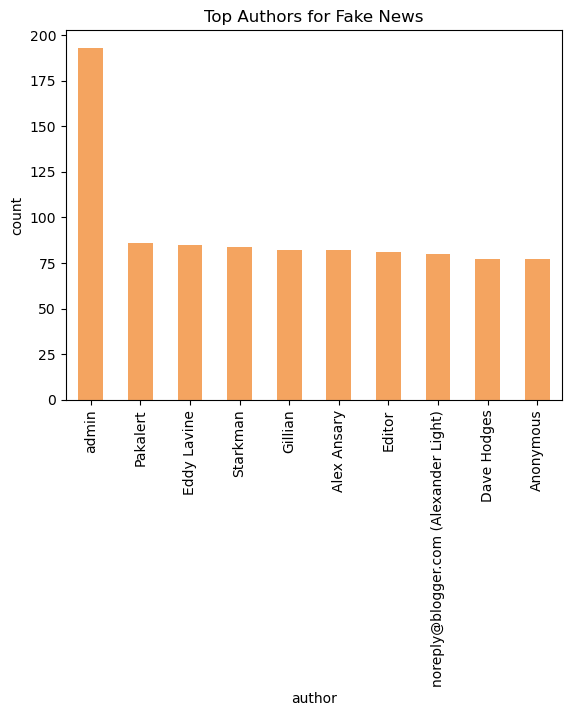

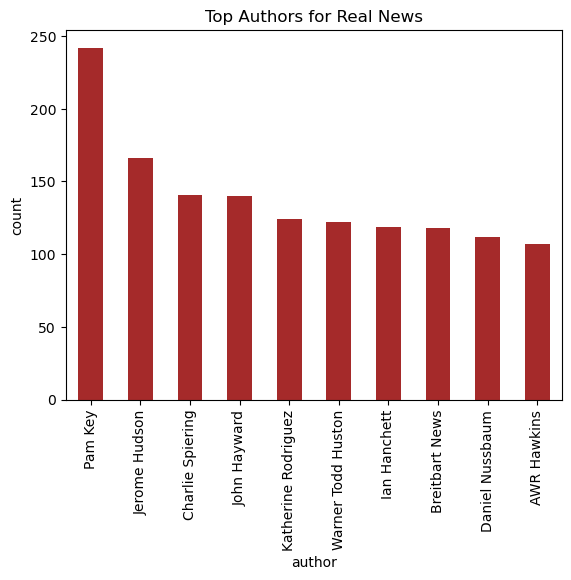

In [194]:
fake_authors = d[d['label'] == 1]['author'].value_counts().head(10)
real_authors = d[d['label'] == 0]['author'].value_counts().head(10)

fake_authors.plot(kind ='bar', color = 'sandybrown', title = 'Top Authors for Fake News')
plt.ylabel('count')
plt.show()
real_authors.plot(kind ='bar', color = 'brown', title = 'Top Authors for Real News')
plt.ylabel('count')
plt.show()

In [198]:
pip install TextBlob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   --------- ------------------------------ 143.4/626.3 kB 1.7 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/626.3 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


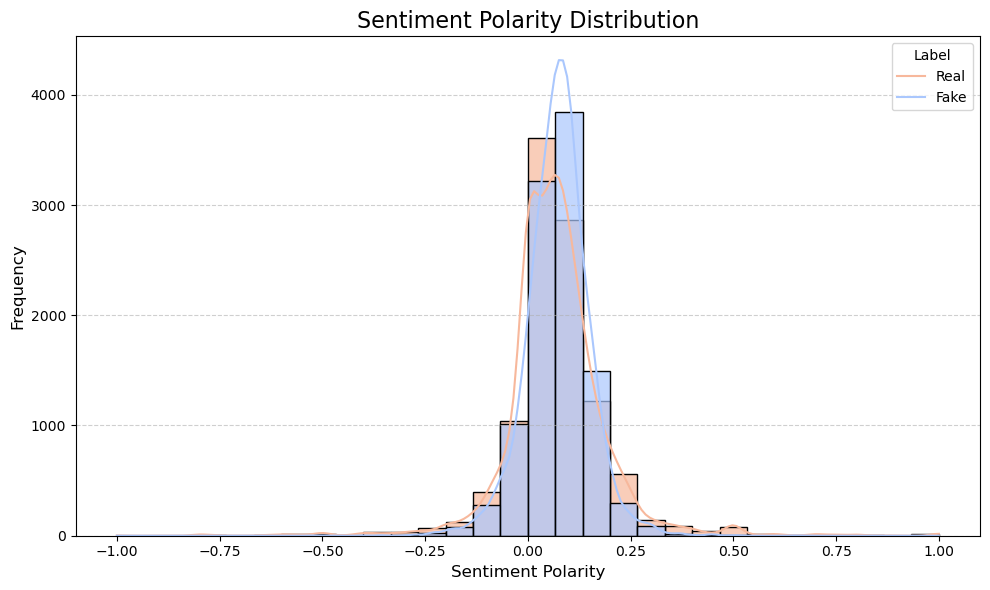

In [206]:
from textblob import TextBlob

d['sentiment'] = d['text'].fillna('').apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(data=d, x='sentiment', hue='label', bins=30, kde=True, palette='coolwarm', alpha=0.7)
plt.title('Sentiment Polarity Distribution', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Label', labels=['Real', 'Fake'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


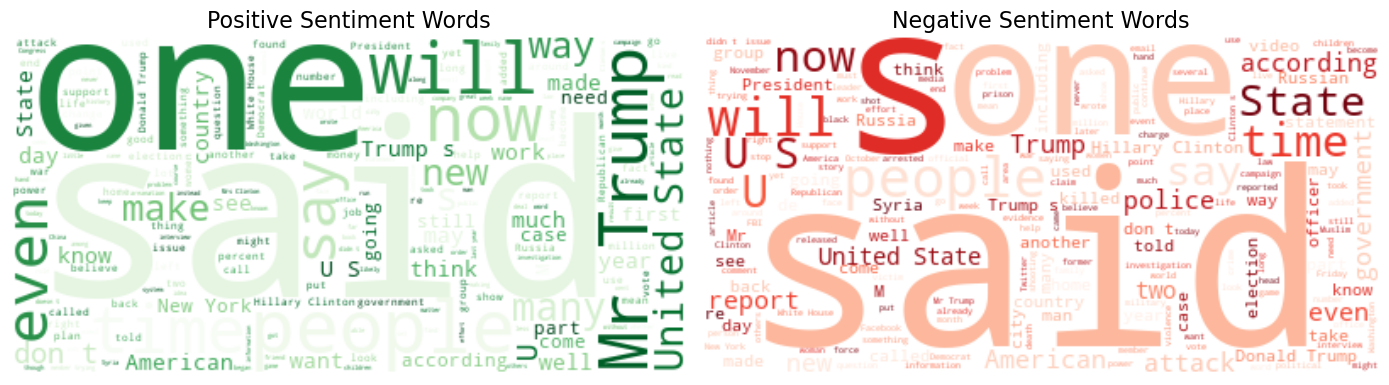

In [229]:
from wordcloud import WordCloud

# Combine text based on sentiment polarity range
positive_text = ' '.join(d[d['sentiment'] > 0]['text'])
negative_text = ' '.join(d[d['sentiment'] < 0]['text'])

# Generate word clouds
positive_wc = WordCloud(background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(background_color='white', colormap='Reds').generate(negative_text)

# Plot
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Sentiment Words', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Sentiment Words', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
d.shape

(20800, 5)

In [17]:
d.duplicated().sum()

0

In [23]:
d.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [21]:
d.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [25]:
d = d.fillna('')

In [27]:
d['content'] = d['author']+' '+d['title']

In [31]:
d.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [33]:
x =  d.drop(columns = 'label', axis = 1)

In [35]:
y = d['label']

In [41]:
x.head(2)

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."


In [39]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

# Stemming 
process of reducing a word to its root word
example - actress, acting, actor, action = act

In [46]:
porter_stem = PorterStemmer()

In [54]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content =[porter_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content 

In [56]:
d['content'] = d['content'].apply(stemming)

In [57]:
d['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [64]:
x = d['content'].values
y = d['label'].values

In [77]:
x

<20800x17128 sparse matrix of type '<class 'numpy.float64'>'
	with 210687 stored elements in Compressed Sparse Row format>

In [68]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [70]:
y.shape, x.shape

((20800,), (20800,))

# Converting textual to numerical data

In [75]:
v = TfidfVectorizer()
v.fit(x)
x = v.transform(x)

In [83]:
print(x)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Splitting dataset

In [88]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y, random_state = 31)

# Training the model

In [95]:
log = LogisticRegression()

In [97]:
model = log.fit(x_train,y_train)

# Evalution

In [108]:
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(train_pred, y_train)
train_accuracy

0.9865985576923076

In [110]:
test_pred = model.predict(x_test)
test_accuracy = accuracy_score(test_pred, y_test)
test_accuracy

0.9778846153846154

# Predictive system

In [113]:
xn = x_test[0]
prediction = model.predict(xn)
prediction
if (prediction[0] == 0):
    print('The news is real')
else:
    print('The news is fake')
    
    

The news is fake


In [117]:
y_test[0]
if (prediction[0] == 0):
    print('The news is real')
else:
    print('The news is fake')
    
    

The news is fake
